# BDAT Lesson 8 - Exploring a Text with NLTK

This notebook shows how you can explore aspects of a text using the Natural Langauge Took Kit (NLTK). It is based on [a similar one that is part of ALTA](https://github.com/sgsinclair/alta/blob/Rockwell's-Edits/ipynb/utilities/Exploring%20a%20text%20with%20NLTK.ipynb). Some of the things this hows you how to do include:

* Tokenize a text 
* Generate a concordance for a word
* Explore collocations (words that are located together)
* Counding words and frequencies
* Finding smiliar words and contexts

For more on NLTK see the online version of the book [Natural Language Processing with Python](http://www.nltk.org/book/). 

## 1.0 Preparing for Exploration

Before we can analyze a text we need to load it in and tokenize it. For tokenization and exploration we are going to use NLTK.

### 1.1 Installing NTLK

Before you can use NTLK you need to make sure it is installed. The [Anaconda Navigator](https://docs.continuum.io/anaconda/navigator) by default installs NLTK, but you can always test if it is installed by importing it with ```import nltk```. Try it. It will give you an error if you don't have it.

In [1]:
import nltk

### 1.2 Getting a Text

Now we will get a text to process with NLTK.

First we see what text files we have. 

In [45]:
%ls *.txt

Hume Enquiry.txt            performanceConcordance.txt
StoryOfWriting.txt          theWritingStory.txt
bigdata.txt


We are going to use the "Hume Enquiry.txt" from the Gutenberg Project. You can use whatever text you want. We print the first 50 characters to check.

In [49]:
theText2Use = "Hume Enquiry.txt"
with open(theText2Use, "r") as fileToRead:
    theString = fileToRead.read()
    
print("This string has", len(theString), "characters.")
print(theString[:50])

This string has 366798 characters.
The Project Gutenberg EBook of An Enquiry Concerni


**Questions**
* Is this a good version of the text? How would we know?
* How can we get rid of all the text at the start and end that are not part of the text?

### 1.3 Tokenization

Now we tokenize the text using NTLK's tokenizer producing a list called "listOfTokens" and check the first words. Note that the NTLK tokenizer doesn't eliminate punctuation and doesn't lower case the words. You can tokenize using another method if you want. Then we create a NLTK text object from the tokens. Note how the text object behaves like a list of tokens.

In [50]:
# This creates a list of tokens from the text
listOfTokens = nltk.word_tokenize(theString)

# This creates a NLTK text object from a list of tokens
theText = nltk.Text(listOfTokens)

print(listOfTokens[:50]) # Show the first 50 tokens

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'An', 'Enquiry', 'Concerning', 'Human', 'Understanding', ',', 'by', 'David', 'Hume', 'and', 'L.', 'A.', 'Selby-Bigge', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the']


## 2.0 Concording

Now we get a concordance for a word in one line. Note that we can control the width of the concordances. Edit the word to explore.

In [51]:
theText.concordance("truth", width=80)

Displaying 21 of 21 matches:
ticism ; and should for ever talk of truth and falsehood , vice and virtue , be
; and consequently , that there is a truth and falsehood in all propositions on
propositions on this subject , and a truth and falsehood , which lie not beyond
rofound enquiry with clearness , and truth with novelty ! And still more happy 
anner ; nor is our evidence of their truth , however great , of a like nature w
for a lion or a tiger ? But the same truth may not appear , at first sight , to
mortified by it , except the love of truth ; and that passion never is , nor ca
h due calmness and distinction . The truth is , an unexperienced reasoner could
 serving nothing to the discovery of truth , but only to make the person of an 
sion . Our evidence , then , for the truth of the _Christian_ religion is less 
on is less than the evidence for the truth of our senses ; because , even in th
d not men commonly an inclination to truth and a principle of probity ; were th
ten at a lo

Note that ```concordance``` is not case sensitive. This will give you a concordance of both capitalized and lower case words.

If you want fewer or more lines then you need to add a parameter *lines=*.

In [52]:
theText.concordance("the", lines=10)

Displaying 10 of 3499 matches:
                                      The Project Gutenberg EBook of An Enquiry
d L. A. Selby-Bigge This eBook is for the use of anyone anywhere at no cost and
 it , give it away or re-use it under the terms of the Project Gutenberg Licens
 away or re-use it under the terms of the Project Gutenberg License included wi
Extracted from : Enquiries Concerning the Human Understanding , and Concerning 
 Human Understanding , and Concerning the Principles of Morals , By David Hume 
rals , By David Hume . Reprinted from The Posthumous Edition of 1777 , and Edit
Second Edition , 1902 CONTENTS I . Of the different Species of Philosophy II . 
fferent Species of Philosophy II . Of the Origin of Ideas III . Of the Associat
 II . Of the Origin of Ideas III . Of the Association of Ideas IV . Sceptical D


One thing that is annoying is that you can't easily save a concordance to a file and that is because the NLTK text object concordance is printed to the screen for exploration. You will need to cut and paste to a word processor to save this.

### 2.1 Plot the Dispersion of Words

We can easily plot the dispersion of words through the text. Note how it is case sensitive.

The line ```%matplotlib inline``` makes sure that the plot is placed inline.

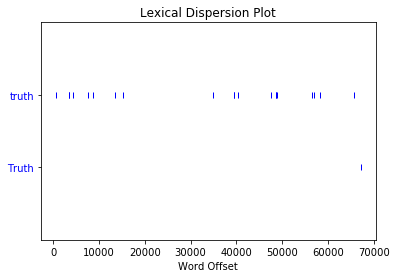

In [58]:
import matplotlib

# This is to force the plots to show inline rather than in another window
%matplotlib inline 

theText.dispersion_plot(["truth","Truth"])

### 2.2 Counting Words and Frequencies

You can also count words. This is case sensitive if you use the text object.

In [59]:
print(theText.count("truth"), " ", theText.count("Truth"))

20   1


To make it case insensitive we are going to lowercase every token and get a new list of tokens. We are also going to get rid of punctuation by keeping only the alphabetical tokens. Then we can count things in the list.

In [61]:
theLowerTokens = []
for token in listOfTokens:
    if token.isalpha():
        theLowerTokens.append(token.lower())
    else:
        theLowerTokens.append(token)

print(theLowerTokens[:20])

['the', 'project', 'gutenberg', 'ebook', 'of', 'an', 'enquiry', 'concerning', 'human', 'understanding', ',', 'by', 'david', 'hume', 'and', 'L.', 'A.', 'Selby-Bigge', 'this', 'ebook']


There is a more efficient way to do this using [list comprehension](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html).

In [62]:
theLowerTokens = [token.lower() for token in listOfTokens if token[0].isalpha()]
print(theLowerTokens[:20])

['the', 'project', 'gutenberg', 'ebook', 'of', 'an', 'enquiry', 'concerning', 'human', 'understanding', 'by', 'david', 'hume', 'and', 'l.', 'a.', 'selby-bigge', 'this', 'ebook', 'is']


In [64]:
listOfLowTokens.count("truth")

21

With NLTK we can get word frequencies. These can be displayed as a table. We can then do other things with the frequency distribution object.

In [66]:
theLowerFreqs = nltk.FreqDist(theLowerTokens)
theLowerFreqs

FreqDist({'the': 3499,
          'project': 91,
          'gutenberg': 32,
          'ebook': 11,
          'of': 2848,
          'an': 243,
          'enquiry': 36,
          'concerning': 90,
          'human': 149,
          'understanding': 55,
          'by': 564,
          'david': 5,
          'hume': 5,
          'and': 2210,
          'l.': 3,
          'a.': 4,
          'selby-bigge': 4,
          'this': 498,
          'is': 955,
          'for': 295,
          'use': 29,
          'anyone': 6,
          'anywhere': 5,
          'at': 172,
          'no': 258,
          'cost': 4,
          'with': 410,
          'almost': 15,
          'restrictions': 2,
          'whatsoever': 4,
          'you': 200,
          'may': 295,
          'copy': 14,
          'it': 786,
          'give': 60,
          'away': 4,
          'or': 711,
          're-use': 2,
          'under': 27,
          'terms': 41,
          'license': 15,
          'included': 3,
          'online': 4,
    

In [40]:
theLowerFreqs.tabulate(10)

 the   of  and   to will them they   is  not  was 
  27   23   19   13    9    8    7    6    6    5 


In [19]:
theLowerFreqs["truth"]

21

Rather than get the count we can get the relative frequency which is the count divided by the number of tokens. This can be very useful for comparing across documents.

In [28]:
theLowerFreqs.freq("the")

0.07180851063829788

## 3.0 Plot the Frequency of Words
We can also plot the high frequency words.

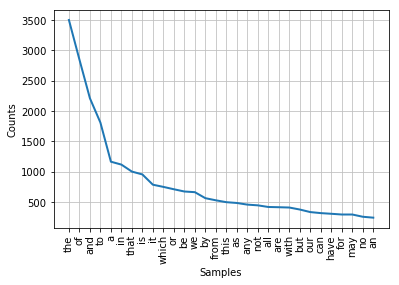

In [67]:
%matplotlib inline
theLowerFreqs.plot(30)

### 3.1 Plotting Content Words

What if we want a to see just the high frequency content words. Here we get the NLTK English stopword list.

In [68]:
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers']


We need to create a new list of tokens without the stopwords.

In [69]:
theLowerContentWords = []

for token in theLowerTokens:
    if token not in stopwords:
        theLowerContentWords.append(token)

theLowerContentWords[:10]

['project',
 'gutenberg',
 'ebook',
 'enquiry',
 'concerning',
 'human',
 'understanding',
 'david',
 'hume',
 'l.']

In [70]:
theLowerContentWords = [token for token in theLowerTokens if token not in stopwords]

Now we can a table of high frequency content words.

In [72]:
theLowerContFreqs = nltk.FreqDist(theLowerContentWords)

theLowerContFreqs.tabulate(8)

       may        one     nature       must         us experience      cause      human 
       295        203        200        177        169        166        157        149 


**Question**: How would you add the stopwords to get rid of words like "may", "one", "must", "us"?

And now we get the Frequency Distribution and plot it.

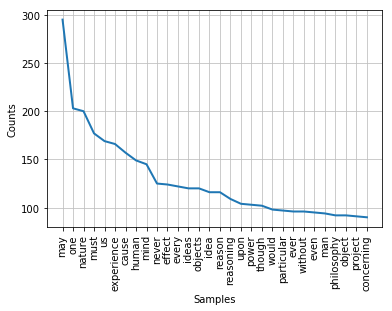

In [73]:
theLowerContFreqs.plot(30)

We might also want to check how these words are used by looking at their concordance.

In [74]:
theText.concordance("experience", width=80)

Displaying 25 of 166 matches:
ials afforded us by the senses and experience . When we think of a golden mounta
priori_ ; but arises entirely from experience , when we find that any particular
nor can our reason , unassisted by experience , ever draw any inference concerni
dily confessed to be known only by experience ; nor does any man imagine that th
ibuting all our knowledge of it to experience . Who will assert that he can give
 operation of our reason , without experience . We fancy , that were we brought 
hout exception , are known only by experience , the following reflections may , 
s arbitrary , where we consult not experience ; so must we also esteem the suppo
 the assistance of observation and experience . 26 . Hence we may discover the r
means of reasonings from analogy , experience , and observation . But as to the 
gs are employed , either to assist experience in the discovery of these laws , o
is a law of motion , discovered by experience , that the moment or force of any

## 4. Collocations, Similar Words, and Contexts

### 4.1 Collocations

NLTK will also let you explore co-locating words by which is meant sets of two or more words that appear frequently together.

In [75]:
theText.collocations(10)

Project Gutenberg-tm; Project Gutenberg; Literary Archive; Gutenberg-
tm electronic; common life; Archive Foundation; electronic works;
Gutenberg Literary; sensible qualities; United States


Note how we are getting a lot of bigrams with "Gutenberg". That's because NLTK looks for bigrams where the words appear together more often than alone. If you ask for more collocations you can see some that have to do with the text.

In [27]:
theText.collocations(100)

Project Gutenberg-tm; Project Gutenberg; Literary Archive; Gutenberg-
tm electronic; common life; Archive Foundation; electronic works;
Gutenberg Literary; sensible qualities; United States; external
objects; human nature; set forth; human testimony; voluntary actions;
electronic work; necessary connexion; public domain; secret powers;
Gutenberg-tm License; regular conjunction; human life; _in infinitum_;
reasonings concerning; usual attendant; one object; constantly
conjoined; David Hume; universally allowed; human understanding; seems
evident; concerning matter; Human Understanding; copyright holder;
take place; simple ideas; real existence; every moment; may observe;
shall find; certain degree; infinitely less; CONCERNING HUMAN; ENQUIRY
CONCERNING; HUMAN UNDERSTANDING; PROJECT GUTENBERG; past experience;
Enquiry Concerning; one event; give rise; good fortune; conjoined
together; human actions; customary transition; infinite number; must
confess; constant conjunction; common sense; n

### 4.2 Similar Words

We can get words that are **similar** to target words. These are not synonyms but words being used in similar contexts. You can use this to expland on a word you are interested in.

In [76]:
theText.similar("truth")

cause reason nature men it ideas necessity mankind action objects
conduct them body power experience resemblance first miracles science
life


You can use this to get concordances of sets of similar words.

In [55]:
listOfWords2Conc = ["reason","fact","knowledge","ideas"]
for i in listOfWords2Conc:
    print(i.upper() + ": ")
    theText.concordance(i, width=80, lines=5)
    print("--------------------------------------------------\n")

REASON: 
Displaying 5 of 116 matches:
Of Liberty and Necessity IX . Of the Reason of Animals X . Of Miracles XI . Of a
eigns . 7 . But is this a sufficient reason , why philosophers should desist fro
iscover the proper province of human reason . For , besides , that many persons 
er parts of nature . And there is no reason to despair of equal success in our e
RT I . 20 . All the objects of human reason or enquiry may naturally be divided 
--------------------------------------------------

FACT: 
Displaying 5 of 89 matches:
tainty and evidence . 21 . Matters of fact , which are the second objects of hum
ing . The contrary of every matter of fact is still possible ; because it can ne
s of any real existence and matter of fact , beyond the present testimony of our
. All reasonings concerning matter of fact seem to be founded on the relation of
a man , why he believes any matter of fact , which is absent ; for instance , th
--------------------------------------------------

KNOWLEDGE: 
D

### 4.3 Common Contexts

NLTK can give us common contexts for words that share them.

In [29]:
theText.common_contexts(["nature", "experience"],10)

human_it of_but by_to of_are the_and by_that this_he in_and of_which
from_and


## Finding Patterns

We can use Regular Expressions on tokens with the ```findall``` method of the Text object. Some guidelines:

* You are matching to tokens, not the raw text. The < and > indicate the token.
* ```<.*>``` matches any token as ```.``` means any character and ```*``` means 0 or more of. ```?``` would mean 
* the paranthesis tell IPython what to show from the match. In first example below you can see how to show all the words right before the word you want.

Here are some examples.

In [30]:
theText.findall("(<.*>)<experience>")

and; from; by; by; to; without; by; not; and; ,; assist; by; to; from;
have; that; this; past; from; from; of; to; of; of; by; from; all;
from; past; by; from; more; more; this; his; from; from; and; of; and;
pure; is; farther; of; our; from; daily; any; and; from; without;
from; by; besides; of; from; And; common; by; we; by; except; certain;
by; and; and; fancied; of; by; without; have; this; have; this;
uniform; and; that; of; no; and; past; past; the; our; seeming; from;
and; not; even; past; greater; 's; and; Though; to; of; infallible;
past; our; by; past; the; from; this; of; uniform; his; have; uniform;
unalterable; from; uniform; uniform; no; we; regular; is; same; of;
the; and; from; past; my; human; make; same; by; in; other; from; of;
If; By; here; any; from; our; and; on; only; by; from; from; by; from;
long; by; from; from; and; of; by; uniform; and; of; by; .; to; for;
only; from; .


In [31]:
theText.findall("<.*><.*><nature>")

of human nature; regard human nature; , that nature; into the nature;
of human nature; derived from nature; parts of nature; concerning
human nature; limits of nature; , where nature; concerning their
nature; triangle in nature; a like nature; is the nature; the same
nature; of this nature; concerning the nature; course of nature;
course of nature; laws of nature; discover in nature; established by
nature; is the nature; , that nature; of their nature; course of
nature; of human nature; similarity which nature; Of what nature;
course of nature; learned the nature; Their secret nature; and
transitory nature; as human nature; of human nature; priori_ the
nature; of human nature; of human nature; of this nature; accurately
the nature; excited by nature; the whole nature; the peculiar nature;
observed that nature; the same nature; a similar nature; course of
nature; works of nature; wisdom of nature; . As nature; the very
nature; contrivance of nature; constitutes the nature; irregularity 

In [32]:
theText.findall("(<.*><.*>)<truth>")

talk of; is a; and a; , and; of their; the same; love of; . The;
discovery of; for the; for the; inclination to; distinguish between;
violation of; violations of; depart from; to reach; _criteria_ of;
with great; love of


In [33]:
theText.findall("<not><.*>?<true>")

not universally true; not a true; not true


---
# Homework: Exploring a Text
Using the NLTK tools create a notebook that explores the text assembled of works by an author. Can you infer anything interested from the text. Explain what you find in the notebook.

How would you check that your inferences are valid? 